In [1]:
#dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

from census import Census
from api_keys import census_key

In [ ]:
url = "https://api.census.gov/data/2018/acs/acs5"

#store variables for total households, average household size, state, and counties
households = "B11016_001E"
average_size = "B25010_001E"

Cali = "06"
LA = "037"
SF = "075"

LA_query = f"{url}?get={households}&for=county:{SF}&in=state:{Cali}&key={census_key}"
LA_house_data = requests.get(LA_query).json()
LA_house_data[1][0]

In [2]:
c = Census(census_key, year=2018)

LA_house_data = c.acs5.get(("NAME", "B11016_001E", "B25010_001E"), {"for": "county:037", "in": "state:06"})
SF_house_data = c.acs5.get(("NAME", "B11016_001E", "B25010_001E"), {"for": "county:075", "in": "state:06"})

LA_house_df = pd.DataFrame(LA_house_data)
LA_house_df = LA_house_df.rename(columns={"B11016_001E": "Total Households", "B25010_001E": "Average Household Size",
                                         "NAME": "Name"})
SF_house_df = pd.DataFrame(SF_house_data)
SF_house_df = SF_house_df.rename(columns={"B11016_001E": "Total Households", "B25010_001E": "Average Household Size",
                                         "NAME": "Name"})

LASF_households = LA_house_df.append(SF_house_df)

In [3]:
LASF_households

,Name,Total Households,Average Household Size,state,county
0,"Los Angeles County, California",3306109.0,3.00,06,037
0,"San Francisco County, California",359673.0,2.36,06,075


In [4]:
#read in csv file "Count_size" for total area numbers
county_size = pd.read_csv("Resources/County_size.csv")
#place elements from Total Area column into new series
total_area = county_size["Total Area"]

#reset index on counties_census_df so the index and series match
LASF_households = LASF_households.reset_index(drop=True)

#add new series to a new column in orginal df
LASF_households["Total Area (square mi.)"] = total_area

#calculate population density and place in new column
LASF_households["Household Density"] = LASF_households["Total Households"] / LASF_households["Total Area (square mi.)"]
LASF_households

,Name,Total Households,Average Household Size,state,county,Total Area (square mi.),Household Density
0,"Los Angeles County, California",3306109.0,3.00,06,037,4751.122,695.858578
1,"San Francisco County, California",359673.0,2.36,06,075,231.890,1551.050067


In [ ]:
LASF_households.dtypes

In [7]:
LASF_households.style.format({"Total Households": "{:,}"})

,Name,Total Households,Average Household Size,state,county,Total Area (square mi.),Household Density
0,"Los Angeles County, California","3,306,109.0",3.000000,06,037,4751.122000,695.858578
1,"San Francisco County, California","359,673.0",2.360000,06,075,231.890000,1551.050067


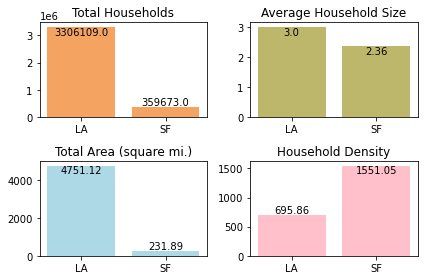

In [8]:
county = LASF_households["Name"]

household = LASF_households["Total Households"]
avg_household = LASF_households["Average Household Size"]
area = LASF_households["Total Area (square mi.)"]
density = LASF_households["Household Density"]

fig, axs = plt.subplots(2, 2)

axs[0, 0].bar(county, household, align="center", color="sandybrown", tick_label=["LA","SF"])
axs[0, 0].set_title("Total Households")
axs[0, 0].text(0, LASF_households.iloc[0, 1], f"{LASF_households.iloc[0, 1]}", ha="center", va="top")
axs[0, 0].text(1, LASF_households.iloc[1, 1], f"{LASF_households.iloc[1, 1]}", ha="center", va="bottom")

axs[0, 1].bar(county, avg_household, align="center", color="darkkhaki", tick_label=["LA","SF"])
axs[0, 1].set_title("Average Household Size")
axs[0, 1].text(0, LASF_households.iloc[0, 2], f"{LASF_households.iloc[0, 2]}", ha="center", va="top")
axs[0, 1].text(1, LASF_households.iloc[1, 2], f"{LASF_households.iloc[1, 2]}", ha="center", va="top")

axs[1, 0].bar(county, area, align="center", color="lightblue", tick_label=["LA","SF"])
axs[1, 0].set_title("Total Area (square mi.)")
axs[1, 0].text(0, LASF_households.iloc[0, 5], f"{round(LASF_households.iloc[0, 5], 2)}", ha="center", va="top")
axs[1, 0].text(1, LASF_households.iloc[1, 5], f"{round(LASF_households.iloc[1, 5], 2)}", ha="center", va="bottom")

axs[1, 1].bar(county, density, align="center", color="pink", tick_label=["LA","SF"])
axs[1, 1].set_title("Household Density")
axs[1, 1].text(0, LASF_households.iloc[0, 6], f"{round(LASF_households.iloc[0, 6], 2)}", ha="center", va="bottom")
axs[1, 1].text(1, LASF_households.iloc[1, 6], f"{round(LASF_households.iloc[1, 6], 2)}", ha="center", va="top")

fig.tight_layout()
plt.savefig("Output_data/Households_BarGraphs.png", dpi=300)
plt.show()

In [11]:
LASF_households.iloc[1, 1].format("{:,}")

AttributeError: 'numpy.float64' object has no attribute 'format'